# **Anime Recommender System on Markdown Notebook**



## Introduction

This notebook outlines the steps taken to build a collaborative and content-based recommender system for a collection of anime titles. The goal is to predict how a user will rate an anime title they have not yet viewed, based on their historical preferences and the characteristics of the anime.


## Project Motivation and Importance

In the age of digital content, recommender systems have become essential tools for personalized content delivery. These systems enhance user experience by suggesting relevant items based on user behavior and item attributes. For anime enthusiasts, discovering new shows that match their tastes can be a delightful experience, and an efficient recommender system can significantly enhance user satisfaction and engagement.

Building an anime recommender system can:

1. **Improve User Experience**: By suggesting anime titles that align with users' preferences, the system can help users find content they are likely to enjoy, reducing the time spent searching for new shows.
2. **Increase Engagement**: Personalized recommendations can increase user interaction and retention, as users are more likely to return to the platform that consistently provides content they like.
3. **Drive Business Value**: For platforms hosting anime content, effective recommendation systems can lead to higher user satisfaction, more views, and ultimately, increased revenue.
4. **Learn User Preferences**: By analyzing user ratings and behavior, the system can gain insights into trends and preferences, which can be valuable for content creators and distributors.

## Steps Covered:
1. Data Loading
2. Preprocessing
3. Exploratory Data Analysis (EDA)
4. Model Training
5. Model Evaluation
6. Conclusion


## 1. Data Loading and Preprocessing

### Importing Necessary Packages


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


### Loading the dataset

In [2]:
# Load the dataset
anime_data = pd.read_csv('anime.csv')
submission_data=pd.read_csv ('submission.csv')
test_data=pd.read_csv ('test.csv')
train_data=pd.read_csv ('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'

In [ ]:

# Display the first few rows of the anime dataset
train_data.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


### Making Copies of Original Datasets**

To minimize the risk of accidental data loss or irreversible changes during the cleaning operations and process, we create copies of the original datasets.This precaution ensures that the original data remains unchanged and can be referred back to if necessary.

In [ ]:
train_data = train_data.copy(deep=True)
test_data = test_data.copy(deep=True)
anime_data = test_data.copy(deep=True)
submission_data_df = test_data.copy(deep=True)

#  2. Data Cleaning and Preprocessing

### Data inspection

a summary of essential information about the dataset. It provides metadata and basic statistics that help understand the structure, composition, and characteristics of our data.

In [ ]:
anime_data.shape

(633686, 2)

In [ ]:
# Inspect the anime_data
print("Anime Data:")
print(anime_data.info())

# Inspect the test_data
print("\nTest Data:")
print(test_data.info())

# Inspect the train_data
print("\nTrain Data:")
print(train_data.info())

Anime Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to 5703554
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB
None


In [ ]:
# Get a summary of the dataset
print(anime_data.describe)
print(test_data.describe)
print(train_data.describe)

<bound method NDFrame.describe of         user_id  anime_id
0         40763     21405
1         68791     10504
2         40487      1281
3         55290       165
4         72323     11111
...         ...       ...
633681     7345      2768
633682    26511      6351
633683    18270      2369
633684    27989     20507
633685    42114      9756

[633686 rows x 2 columns]>
<bound method NDFrame.describe of         user_id  anime_id
0         40763     21405
1         68791     10504
2         40487      1281
3         55290       165
4         72323     11111
...         ...       ...
633681     7345      2768
633682    26511      6351
633683    18270      2369
633684    27989     20507
633685    42114      9756

[633686 rows x 2 columns]>
<bound method NDFrame.describe of          user_id  anime_id  rating
0              1     11617      10
1              1     11757      10
2              1     15451      10
3              2     11771      10
4              3        20       8
...     

### handling missing values

the process of managing or dealing with data points that are absent or undefined in a dataset. Missing values can occur due to various reasons such as data collection errors, data corruption during storage or transmission.

In [ ]:
# Check for missing values in anime_data
print("Missing values in anime_data:")
print(anime_data.isnull().sum())

# Check for missing values in test_data
print("\nMissing values in test_data:")
print(test_data.isnull().sum())

# Check for missing values in train_data
print("\nMissing values in train_data:")
print(train_data.isnull().sum())


Missing values in anime_data:
user_id     0
anime_id    0
dtype: int64

Missing values in test_data:
user_id     0
anime_id    0
dtype: int64

Missing values in train_data:
user_id     0
anime_id    0
rating      0
dtype: int64


Display the number of null values present in each column, helping to quickly identify where data is missing.

In [ ]:
# Display the number of null values before cleaning
print("Null values count before cleaning:")
print(anime_data.isnull().sum())

# Remove rows with any null values
anime_data_cleaned = anime_data.dropna()

# Display the number of null values after cleaning
print("\nNull values count after cleaning:")
print(anime_data_cleaned.isnull().sum())

anime_data_cleaned.reset_index(drop=True, inplace=True)

# Print the shape of the cleaned dataset
print(f"\nShape of cleaned dataset: {anime_data_cleaned.shape}")


Null values count before cleaning:
user_id     0
anime_id    0
dtype: int64

Null values count after cleaning:
user_id     0
anime_id    0
dtype: int64

Shape of cleaned dataset: (633686, 2)


### Removing Duplicates

the process of identifying and eliminating identical or redundant entries within a dataset.

In [ ]:
# Check for duplicates in anime_data
print("Duplicates in anime_data:", anime_data.duplicated().sum())

# Check for duplicates in submission_data
print("Duplicates in submission_data:", submission_data.duplicated().sum())

# Check for duplicates in test_data
print("Duplicates in test_data:", test_data.duplicated().sum())

# Check for duplicates in train_data
print("Duplicates in train_data:", train_data.duplicated().sum())


Duplicates in anime_data: 0
Duplicates in submission_data: 0
Duplicates in test_data: 0
Duplicates in train_data: 1


In [ ]:
# Remove duplicates in train_data
train_data.drop_duplicates(inplace=True)
print('removed duplicates in train_data')

removed duplicates in train_data


## Preprocessing

transform and prepare the data for it to become more suitable and meaningful for the specific analytical approaches

### Validation and Testing

verifying the Removal of all rows containing any missing (NaN) values, ensuring that subsequent analyses are based on complete cases without any missing values and duplicates.

In [ ]:
# Remove rows with any null values
anime_data_cleaned = anime_data.dropna()

# Display the number of null values after cleaning
print("\nNull values count after cleaning:")
print(anime_data_cleaned.isnull().sum())

# Verify duplicates removal after cleaning
print(f"\nDuplicates count after cleaning: {anime_data_cleaned.duplicated().sum()}")



Null values count after cleaning:
user_id     0
anime_id    0
dtype: int64

Duplicates count after cleaning: 0


In [ ]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame
anime_data.to_csv('processed_anime_data.csv', index=False)

# Assuming 'data' is a pandas DataFrame
test_data.to_csv('processed_test_data.csv', index=False)

# Assuming 'data' is a pandas DataFrame
train_data.to_csv('processed_train_data.csv', index=False)




### Encode Categorical Variables

Convert the target variable (Category) into numerical labels using Label Encoding.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
anime_data = pd.read_csv('processed_anime_data.csv')
test_data = pd.read_csv('processed_test_data.csv')
train_data = pd.read_csv('Processed_train_data.csv')

# Standardize column names for each dataset
def standardize_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
    return df

anime_data = standardize_column_names(anime_data)
test_data = standardize_column_names(test_data)
train_data = standardize_column_names(train_data)

# Handling missing values: Fill missing values with mean for numerical columns
def fill_missing_values(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df

anime_data = fill_missing_values(anime_data)
submission_data = fill_missing_values(submission_data)
test_data = fill_missing_values(test_data)
train_data = fill_missing_values(train_data)

# Encoding categorical variables using LabelEncoder and OneHotEncoder
def encode_categorical_variables(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False, drop='first')

    for column in categorical_columns:
        # Label Encoding
        df[column] = le.fit_transform(df[column])
        # One-Hot Encoding
        encoded_columns = ohe.fit_transform(df[[column]])
        encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out([column]))
        df = df.drop([column], axis=1).join(encoded_df)





C:\Users\User\AppData\Local\Temp\ipykernel_28652\2517960974.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


### Preprocessing

transform and prepare the data for it to become more suitable and meaningful for the specific analytical approaches

### descriptive statistics

summarizing and organizing the data to describe the basic features of the data

In [ ]:


# Inspect data types
print("Data Types:")
print(anime_data.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(anime_data.describe())


# Unique value count for each column
print("\nUnique Value Count for Each Column:")
print(anime_data.nunique())

print('no descriptive statistics for catagorical columns')

Data Types:
user_id     int64
anime_id    int64
dtype: object

Descriptive Statistics for Numerical Columns:
             user_id       anime_id
count  633686.000000  633686.000000
mean    36777.752605    8909.389543
std     21028.330970    8880.430436
min         1.000000       1.000000
25%     18974.000000    1240.000000
50%     36919.000000    6213.000000
75%     54908.000000   14131.000000
max     73516.000000   34367.000000

Unique Value Count for Each Column:
user_id     57053
anime_id     7785
dtype: int64
no descriptive statistics for catagorical columns


In [ ]:
import pandas as pd

anime_data = pd.read_csv('train.csv')

# Inspect data types
print("Data Types:")
print(anime_data.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(anime_data.describe())

# Unique value count for each column
print("\nUnique Value Count for Each Column:")
print(anime_data.nunique())

print('no descriptive statistics for catagorical columns')


Data Types:
user_id     int64
anime_id    int64
rating      int64
dtype: object

Descriptive Statistics for Numerical Columns:
            user_id      anime_id        rating
count  5.703555e+06  5.703555e+06  5.703555e+06
mean   3.674460e+04  8.902142e+03  7.808691e+00
std    2.101174e+04  8.882174e+03  1.572449e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.898500e+04  1.239000e+03  7.000000e+00
50%    3.680200e+04  6.213000e+03  8.000000e+00
75%    5.487300e+04  1.407500e+04  9.000000e+00
max    7.351600e+04  3.447500e+04  1.000000e+01

Unique Value Count for Each Column:
user_id     69481
anime_id     9838
rating         10
dtype: int64
no descriptive statistics for catagorical columns


## 3. EDA

###Data Import and Setup:

Imported necessary libraries: pandas for data manipulation.
Uploaded the datasets (anime.csv, submission.csv, test.csv, train.csv) to Google Colab.


###Loading Datasets:

Loaded the datasets into pandas DataFrames:
anime_df from anime.csv
train_df from train.csv

###Initial Inspection:

Displayed the structure and summary of each dataset using .info():
Reviewed columns, data types, and non-null counts.

In [ ]:
import pandas as pd


# Display the first few rows of the anime dataset
print(train_data.head())

# Making Copies of Original Datasets
train_data = train_data.copy(deep=True)
test_data = test_data.copy(deep=True)
anime_data = anime_data.copy(deep=True)
submission_data = submission_data.copy(deep=True)

   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


###Outlier Detection:

Used the IQR method to detect outliers in the rating column:
Calculated quartiles (Q1 and Q3) and IQR.
Identified outliers outside the bounds defined by 1.5 * IQR.

In [ ]:
# Detect outliers using the IQR method
Q1 = anime_data['rating'].quantile(0.25)
Q3 = anime_data['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = anime_data[(anime_data['rating'] < lower_bound) | (anime_data['rating'] > upper_bound)]
print("Number of outliers in anime ratings:", outliers.shape[0])


Number of outliers in anime ratings: 229


###Outlier Capping:

Capped outliers in the rating column:
Set values below the lower bound to the lower bound.
Set values above the upper bound to the upper bound.

###Final Verification:

Confirmed that outliers were capped by reviewing the updated rating column.

In [ ]:
# Capping outliers
Q1 = anime_df['rating'].quantile(0.25)
Q3 = anime_df['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the ratings at the lower and upper bounds
anime_df['rating'] = anime_df['rating'].clip(lower=lower_bound, upper=upper_bound)


NameError: name 'anime_df' is not defined

###Visualizing Rating Distribution:

We began by analyzing the distribution of ratings in our training dataset to understand how ratings are spread across different values. Using matplotlib, we created a bar plot to visualize this distribution. The plot revealed the frequency of each rating, which helped us see if there were any imbalances or patterns in how ratings were distributed.


###Exploring Rating Frequencies:

By examining the distribution of ratings through a bar chart, we were able to see which ratings were more common and which were less frequent. This step was crucial in understanding the dataset's composition and ensuring that no particular rating was overly dominant or underrepresented.


###Identifying Imbalances:

We noticed that some ratings were significantly more frequent than others, indicating an imbalance in the dataset. For effective model training, especially for classification tasks, a balanced dataset is essential to avoid bias towards more frequent classes.

###Balancing the Dataset:

To address the imbalance, we first identified the majority and minority classes based on the rating counts. The majority class had more samples compared to the minority class.

###Resampling the Minority Class:

We employed the technique of upsampling to balance the dataset. By increasing the number of samples in the minority class to match the majority class, we aimed to create a more balanced dataset. This was achieved using the resample method, which allowed us to duplicate minority class samples to reach parity with the majority class.


###Combining and Verifying:

After resampling, we combined the upsampled minority class with the original majority class to form a balanced training dataset. We then verified the new class distribution to ensure that the dataset was now balanced and ready for model training.###

rating
8     0.259695
7     0.217041
9     0.197888
10    0.150864
6     0.100638
5     0.044607
4     0.016440
3     0.006549
2     0.003658
1     0.002619
Name: proportion, dtype: float64


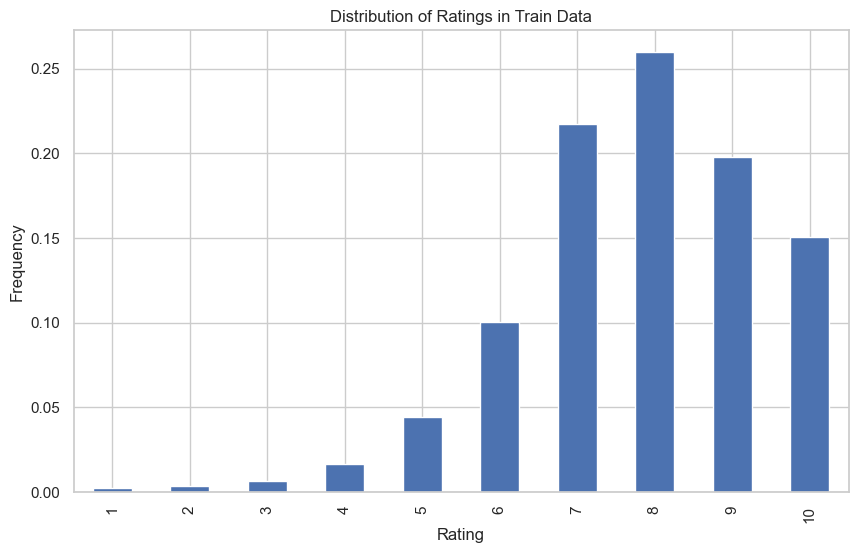

rating
8    1481186
1    1481186
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# Check the distribution of ratings
rating_distribution = train_df['rating'].value_counts(normalize=True)
print(rating_distribution)

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
rating_distribution.sort_index().plot(kind='bar')
plt.title('Distribution of Ratings in Train Data')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# If needed, balance the data (example: undersample the majority class or oversample the minority class)
from sklearn.utils import resample

# Separate the majority and minority classes
rating_counts = train_df['rating'].value_counts()
majority_class = rating_counts.idxmax()
minority_class = rating_counts.idxmin()

# Resample the minority class
df_minority = train_df[train_df['rating'] == minority_class]
df_majority = train_df[train_df['rating'] == majority_class]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(train_df_balanced['rating'].value_counts())


###Separating Classes:

We began by isolating each class in the train_df dataset based on rating values ranging from 1 to 10. This was achieved by creating separate DataFrames for each rating class using a list comprehension. This step allowed us to handle each rating category individually.


###Determining the Target Size:

To balance the classes, we needed to determine the size to which each class should be resampled. We identified the smallest class size among all rating categories to use as the target size for resampling. This ensures that all classes would be balanced to the size of the smallest class.


###Resampling Classes:

We applied resampling to each class DataFrame to match the target size. By setting replace=True, we allowed sampling with replacement, which means that each class would be replicated until it reached the target size. This process was repeated for each rating class to ensure that all classes had an equal number of samples.


###Combining Resampled Data:

After resampling, we combined all the resampled DataFrames into a single balanced DataFrame using pd.concat(). This merged all rating classes into a unified dataset where each class was equally represented.


###Verifying and Visualizing the Balanced Dataset:

We checked the distribution of the balanced dataset by printing the value counts for each rating category, verifying that the dataset was now equally distributed across all ratings.

To visualize the balanced distribution, we created a bar plot showing the frequency of each rating in the balanced dataset. The plot confirmed that the ratings were evenly distributed, ensuring a fair representation of all classes.

In [ ]:
from sklearn.utils import resample

# Separate each class
df_list = [train_df[train_df['rating'] == rating] for rating in range(1, 11)]

# Find the target size to balance the classes
target_size = min([df.shape[0] for df in df_list])

# Resample each class to the target size
df_resampled = [resample(df, replace=True, n_samples=target_size, random_state=123) for df in df_list]

# Combine all resampled dataframes
train_df_balanced = pd.concat(df_resampled)

# Check the distribution of the balanced dataset
print(train_df_balanced['rating'].value_counts(normalize=True))

# Plot the distribution of the balanced ratings
plt.figure(figsize=(10, 6))
train_df_balanced['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Balanced Distribution of Ratings in Train Data')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


NameError: name 'train_df' is not defined

###Saving the Balanced Data:


After balancing the dataset by resampling, we saved the resulting DataFrame, train_df_balanced, to a CSV file. This was done using the to_csv method from pandas, which allows us to export the DataFrame to a file format that is easy to share and use in other applications.

The file was saved with the name train_balanced.csv, and the index=False parameter was specified to ensure that row indices were not included in the output file.

In [ ]:
# Save the balanced dataset to a CSV file
train_df_balanced.to_csv('train_balanced.csv', index=False)


###Importing Necessary Libraries:

Imported pandas for data manipulation, matplotlib.pyplot for basic plotting, and seaborn for advanced visualization.


###Setting Visualization Style:

Configured the visualization style using Seaborn’s set method with style="whitegrid". This style adds a white background with gridlines, making plots easier to read and interpret.


###Loading the Balanced Dataset:

Loaded the previously balanced training dataset from the file train_balanced.csv into a DataFrame named train_df_balanced. This dataset is now ready for further analysis and visualization.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")
# Load the balanced train dataset
train_df_balanced = pd.read_csv('train_balanced.csv')


###Summary Statistics for the Balanced Training Dataset:

Generated summary statistics for the balanced training dataset to understand its numerical features. This includes key metrics such as count, mean, standard deviation, minimum, and maximum values, which offer insights into the overall distribution and central tendencies within the data.


###Summary Statistics for the Anime Dataset:

Produced summary statistics for the anime dataset, including details on all columns. This comprehensive overview covers not just numerical data, but also categorical and object types. It provides information on counts, unique values, the most frequent values, and their frequencies.


In [ ]:
# Summary statistics for the balanced train dataset
print(train_df_balanced.describe())

# Summary statistics for the anime dataset
print(anime_df.describe(include='all'))


             user_id       anime_id         rating
count  149370.000000  149370.000000  149370.000000
mean    36386.851751    8699.530368       5.500000
std     20912.960658    8806.081047       2.872291
min         3.000000       1.000000       1.000000
25%     18739.000000    1285.000000       3.000000
50%     36110.000000    5772.500000       5.500000
75%     54524.750000   13599.000000       8.000000
max     73512.000000   34367.000000      10.000000
            anime_id                     name   genre   type episodes  \
count   12294.000000                    12294   12294  12294    12294   
unique           NaN                    12292    3265      7      187   
top              NaN  Shi Wan Ge Leng Xiaohua  Hentai     TV        1   
freq             NaN                        2     823   3787     5677   
mean    14058.221653                      NaN     NaN    NaN      NaN   
std     11455.294701                      NaN     NaN    NaN      NaN   
min         1.000000          

###Creating the Plot:

We set up a plot with a size of 10 by 6 inches for clear visibility. Using Seaborn’s countplot, we visualized the distribution of ratings in the balanced training dataset.


###Customizing the Visualization:

The countplot function was used to display the frequency of each rating, with ratings represented on the x-axis and their corresponding frequencies on the y-axis.
Applied the viridis color palette to enhance visual appeal and readability.


###Title and Labels:

Added a title to the plot, "Distribution of Ratings in Balanced Train Data," to clearly convey the content of the plot.
Labeled the x-axis as "Rating" and the y-axis as "Frequency" to accurately describe the data being presented.


###Displaying the Plot:

Showcased the plot to provide a visual representation of how ratings are distributed in the balanced dataset, confirming that each rating is now equally represented.


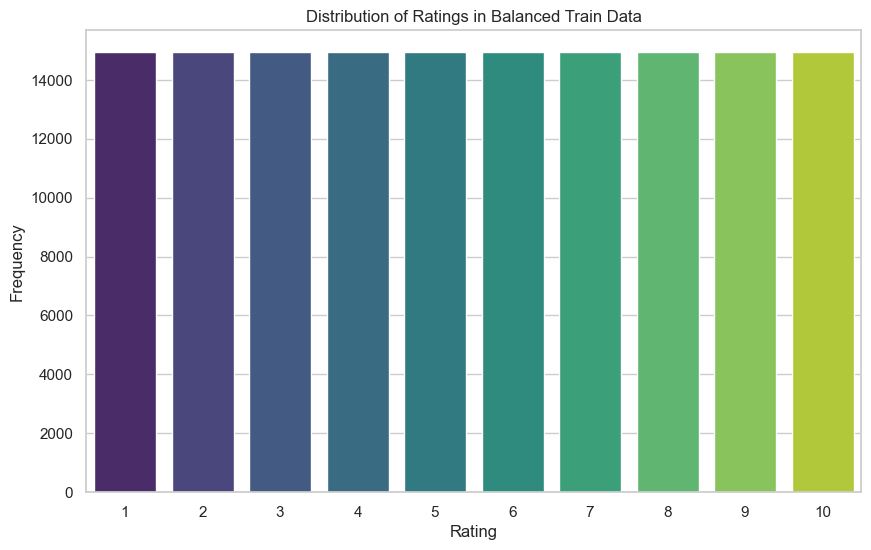

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=train_df_balanced, palette='viridis')
plt.title('Distribution of Ratings in Balanced Train Data')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


###Creating the Histogram:

Used Seaborn’s histplot to display the distribution of ratings in the anime dataset. The histogram bins were set to 10 to group ratings into discrete intervals, and a Kernel Density Estimate (KDE) was included to show the smooth distribution curve over the histogram.


###Customizing the Visualization:

Applied the viridis color palette to enhance the visual appeal and readability of the plot.


###Adding Title and Labels:

Added a title, "Distribution of Ratings in Anime Data," to clearly describe what the plot represents.
Labeled the x-axis as "Rating" and the y-axis as "Frequency" to accurately describe the plotted data.


###Displaying the Plot:

Presented the plot to illustrate how ratings are distributed across the anime dataset, providing insights into rating frequencies and overall distribution trends.

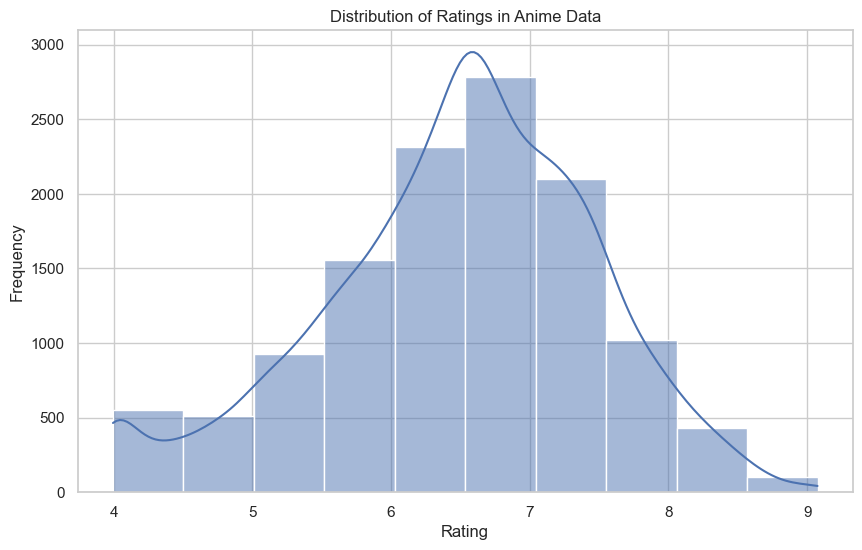

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(anime_df['rating'], bins=10, kde=True, palette='viridis')
plt.title('Distribution of Ratings in Anime Data')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##Insights from the Distribution of Ratings in Anime Data

###Distribution Shape:

The distribution of ratings shows a unimodal pattern, with the highest frequency around the rating of 7. This indicates that most animes are rated between 6 and 8.

###Central Tendency:

The peak of the distribution at a rating of 7 suggests that the central tendency of anime ratings is slightly above average.

###Spread:

The ratings range from 4 to 9, showing that the dataset includes a wide variety of anime ratings, though extreme low and high ratings are less frequent.

###Skewness:

The distribution has a slight right skew, indicating that there are more animes with ratings below the peak compared to those above it.

###KDE Curve:

The Kernel Density Estimate (KDE) curve provides a smooth representation of the rating distribution, confirming the central concentration around the rating of 7 and the tapering off of frequencies towards the higher and lower ends.

###Creating the Count Plot:

Used Seaborn’s countplot to display the frequency of each genre. Genres were plotted on the y-axis, and their frequencies on the x-axis.
Ordered the genres by their frequency to make the most common genres appear at the top, enhancing interpretability.


###Customizing the Visualization:

Applied the viridis color palette for visual appeal and clarity.


###Adding Title and Labels:

Added a title, "Distribution of Genres in Anime Data," to describe the plot’s purpose.
Labeled the x-axis as "Frequency" and the y-axis as "Genre" to accurately convey the data being presented.


###Displaying the Plot:

Presented the plot to provide a clear view of genre distribution across the anime dataset, showcasing which genres are most and least frequent.

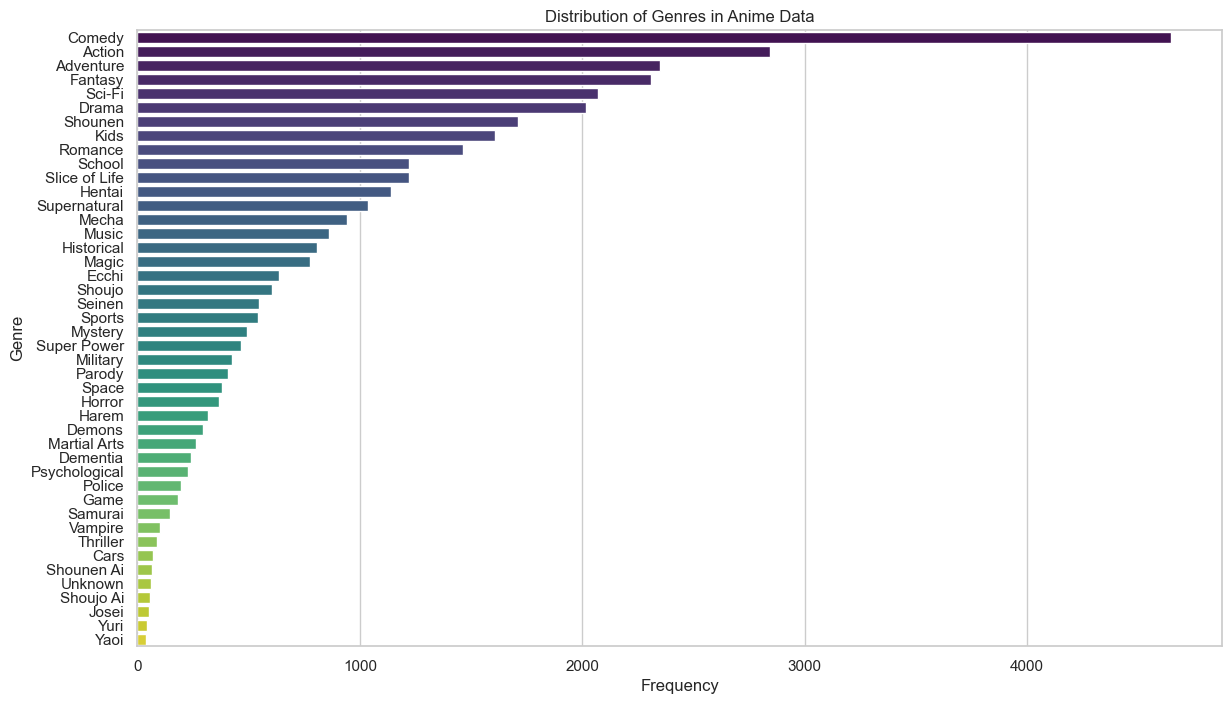

In [ ]:
# Split genres and explode the dataframe
anime_df_exploded = anime_df.assign(genre=anime_df['genre'].str.split(', ')).explode('genre')

# Plot the distribution of genres
plt.figure(figsize=(14, 8))
sns.countplot(y='genre', data=anime_df_exploded, order=anime_df_exploded['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres in Anime Data')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


##Insights from the Distribution of Genres in Anime Data

###Dominant Genre:

Comedy is the most frequent genre, significantly leading in popularity among anime titles.

###Popular Genres:

Action, Adventure, Fantasy, Sci-Fi, and Drama are also highly represented, indicating a strong preference for these genres within the dataset.

###Moderate Representation:

Genres like Shounen, Kids, Romance, and School have a moderate presence, suggesting these are also common but not as dominant as the top genres.

###Niche Genres:

Less frequent genres include Thriller, Cars, Shounen Ai, and Unknown, indicating these genres are less prevalent in the dataset.

###Diverse Range:

The dataset showcases a diverse range of genres, reflecting a wide variety of themes and styles within anime.

###Plot Setup:

Created a scatter plot with a size of 10 by 6 inches to visualize the relationship between ratings and the number of members.


###Visualization:

Used Seaborn’s scatterplot to plot rating on the x-axis and members on the y-axis.
Applied the viridis color palette for visual clarity.


###Customization:

Added a title, "Rating vs. Members in Anime Data," and labeled the axes for better interpretation.


###Result:

Displayed the plot to illustrate how anime ratings correlate with the number of members.


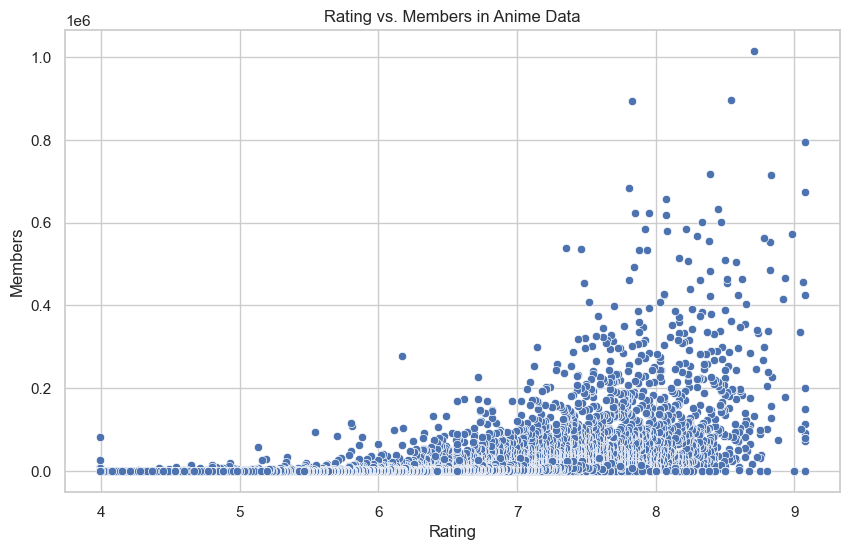

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='members', data=anime_df, palette='viridis')
plt.title('Rating vs. Members in Anime Data')
plt.xlabel('Rating')
plt.ylabel('Members')
plt.show()


###Positive Correlation:
There is a general trend showing that anime with higher ratings tend to have more members. However, this is not a strict rule as there are many highly rated anime with fewer members.

###Density at Lower Ratings:
A significant number of anime have lower ratings (around 4 to 7) with relatively fewer members. This suggests that many anime don't achieve high popularity or high ratings.

###Popularity Peaks:
The most popular anime (with the highest number of members) tend to have ratings between 7 and 9. There are notable outliers with extremely high membership counts even in this range.

###Outliers:
There are several outliers with a very high number of members, even among the anime with high ratings (around 8 to 9). This indicates that some anime are exceptionally popular.

###Sparse Distribution:
As the ratings increase, the number of members generally increases, but there is a wide variance. This indicates that while higher ratings are generally associated with more members, there are many exceptions.

###Plot Setup:

Created a bar plot with a size of 10 by 6 inches to visualize the distribution of anime types.

###Visualization:

Used Seaborn’s countplot to display the frequency of each anime type on the x-axis, with the count of each type on the y-axis.
Applied the viridis color palette for better visual appeal.


###Customization:

Added a title, "Distribution of Anime Types," and labeled the axes for clarity.


###Result:

Displayed the plot to show

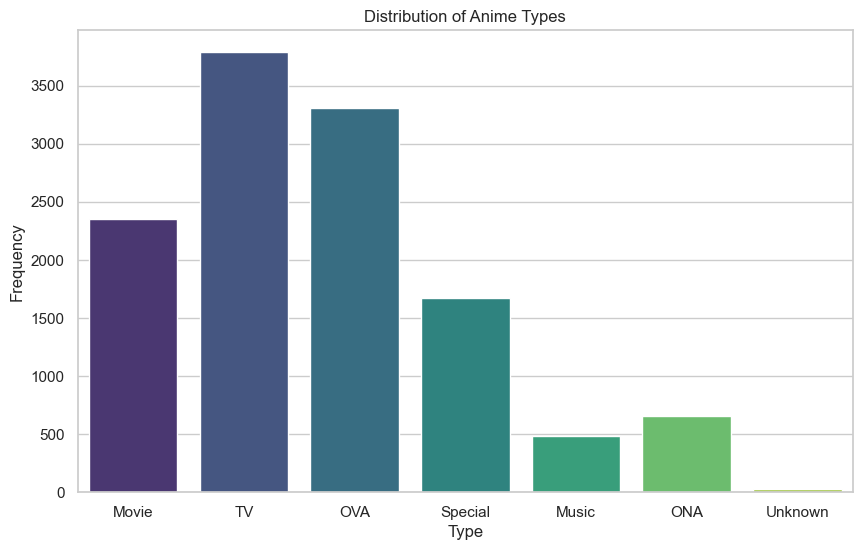

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=anime_df, palette='viridis')
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()


##Insights from Distribution of Anime Types

###TV Anime Dominates:
TV series are the most common type of anime, with the highest frequency. This suggests that TV series are a popular format for anime production.

###High Frequency of OVA and Movies:
Original Video Animation (OVA) and Movies are also quite prevalent, with OVAs being the second most common and Movies following closely behind. This indicates that these formats are also significant in the anime industry.

###Specials and Music:
Specials, which often include short episodes or bonus content, have a moderate frequency. Music-related anime, though less common, still have a presence.

###ONA (Original Net Animation):
ONAs, which are typically distributed via the internet rather than traditional broadcasting, have a smaller yet notable frequency. This reflects the growing trend of online streaming platforms.

###Unknown Category:
The unknown category has the least frequency, indicating that there are very few anime entries with unspecified types.

###Plot Setup:

Created a box plot with a size of 10 by 6 inches to examine the distribution of episodes across different anime types.


###Visualization:

Used Seaborn’s boxplot to show the distribution of the number of episodes (episodes) for each anime type (type).
Applied the viridis color palette to enhance the plot’s readability.


###Customization:

Added a title, "Episodes Distribution by Anime Type," and labeled the axes for clarity.


####Result:

Displayed the plot to visualize how the number of episodes varies between different anime types.

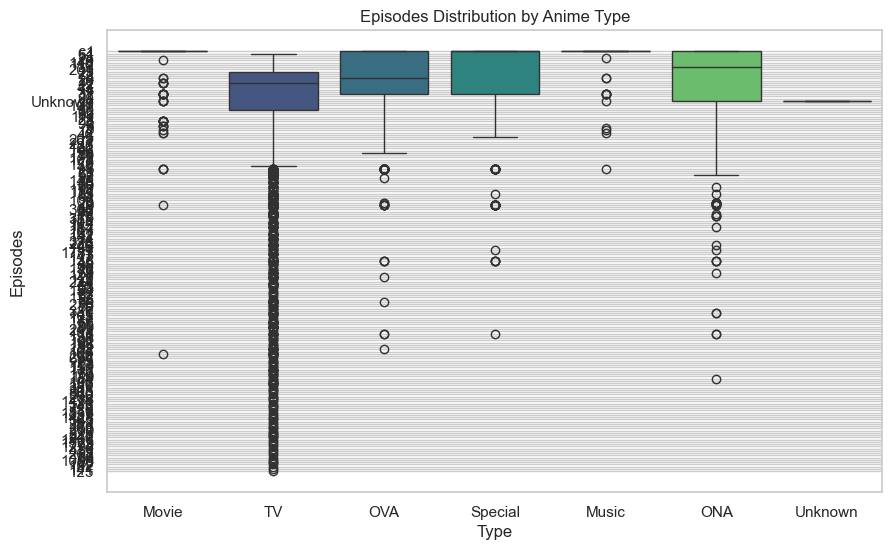

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='episodes', data=anime_df, palette='viridis')
plt.title('Episodes Distribution by Anime Type')
plt.xlabel('Type')
plt.ylabel('Episodes')
plt.show()


##Insights from Episodes Distribution by Anime Type

###TV Anime:
TV anime shows have a wide range of episode counts, with many outliers. The median episode count is higher compared to other types, indicating that TV series typically have more episodes. The whiskers show that most TV anime have between 12 and 26 episodes, but there are many series with significantly more episodes.

###OVA (Original Video Animation):
OVAs have a more compact distribution with fewer episodes on average. The median number of episodes is relatively low, and the interquartile range is narrow, suggesting that OVAs are typically shorter series or special episodes.

###Specials:
Specials also tend to have fewer episodes, similar to OVAs. The distribution is tight, and most specials have a low number of episodes, typically between 1 and 3.

###Movies:
Movies generally have one episode (as expected since they are standalone features), with some outliers possibly indicating series of movies or compilation films.

###Music:
Music-related anime have a low number of episodes, with a narrow distribution similar to OVAs and Specials.

###ONA (Original Net Animation):
ONAs show a similar pattern to TV anime but generally have fewer episodes. The interquartile range is slightly broader than OVAs and Specials, indicating some variability in episode counts.

###Unknown:
The 'Unknown' category shows a wide range of episodes, but due to its undefined nature, it's hard to draw specific conclusions.

###Selecting Numeric Columns:

Extracted only the numeric columns from the anime dataset to focus on variables that can be correlated.


###Generating the Correlation Matrix:

Calculated the correlation matrix to assess the relationships between numeric features in the dataset.


###Visualization:

Created a heatmap with a size of 10 by 6 inches to display the correlation matrix.
Used Seaborn’s heatmap to show correlations, applying the viridis color palette for enhanced visualization.
Annotated the heatmap with correlation coefficients for clarity.


###Result:

Displayed the heatmap to visualize how numeric features in the anime dataset are correlated with each other.

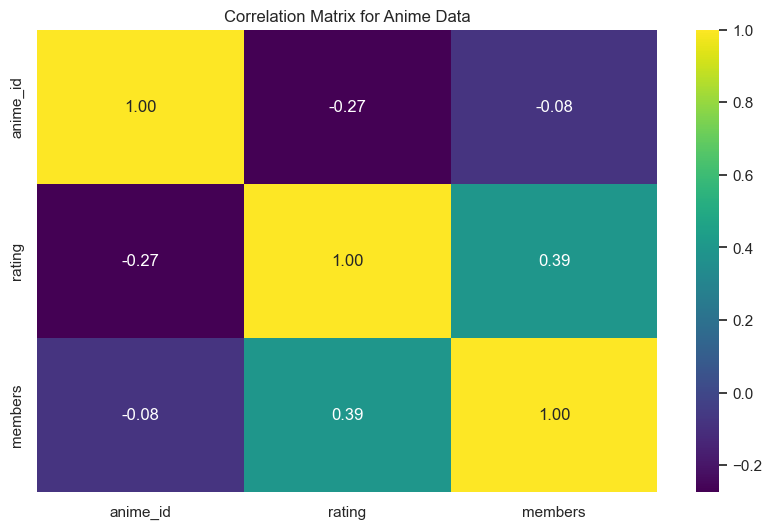

In [ ]:
# Select only the numeric columns
numeric_cols = anime_df.select_dtypes(include=[float, int])

# Generate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix for Anime Data')
plt.show()


##Insights from Correlation Matrix for Anoime Data

###Perfect Self-Correlations:
Expected perfect correlations for Anime ID, Rating, and Members with themselves.

###Anime ID Correlations:
Negative with Rating: Newer anime might have slightly lower ratings.
Strong Negative with Members: Newer anime tend to have fewer members, likely due to less time to build a fanbase.

###Rating and Members:
Moderate Positive Correlation: Higher-rated anime tend to attract more members, but other factors also play significant roles.

##Possible Implications:
###Newer Anime:
The data suggests that newer anime, indicated by higher IDs, generally have fewer members and slightly lower ratings. This could be due to newer anime not having enough time to gain popularity or due to differences in rating trends over time.

###Membership and Quality:
While higher ratings do correlate with more members, the moderate correlation (0.39) indicates that other factors, such as marketing, genre popularity, and availability, also play significant roles in attracting members.

# 4. Recommender Model Training and Testing

## Content Based Filtering


### Data Preprocessing and Computing

In [ ]:
# Import 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convenient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
A = np.array([[3,4]]) # <-- Rating vector A
B = np.array([[5,2]]) # <-- Rating vector B
cosine_similarity(A,B) # Sim(A,B)

array([[0.85419856]])

In [ ]:
anime_ratings = pd.read_csv('anime.csv')
anime_ratings.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
print (f'Number of ratings in dataset: {anime_ratings.shape[0]}')

Number of ratings in dataset: 12294


In [ ]:
train_ratings = pd.read_csv('train.csv')
train_ratings.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


Let's look at the distribution of the ratings given by users. Here, we see that readers generally are on the kinder end of the rating spectrum, with a far higher proportion of positive reviews (> 3) being given over negative ones (< 3):

Average rating in dataset: 7.808690544756735


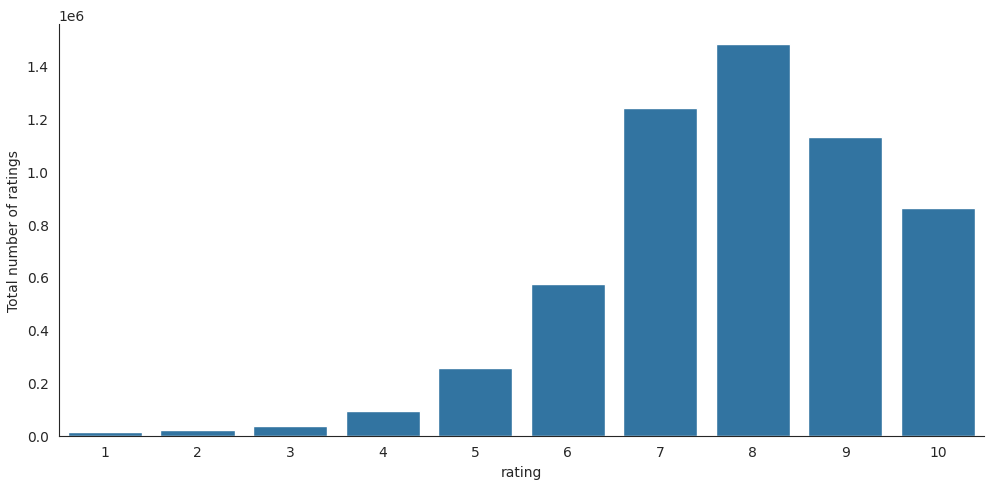

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(data=train_ratings, x="rating", y=None, aspect=2.0, kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train_ratings["rating"])}')

Content filtering-based recommendation algorithm.

In [ ]:
anime_ratings['auth_tags'] = (pd.Series(anime_ratings[['type', 'genre']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

# Convenient indexes to map between book types and indexes of 
# the anime dataframe
name = anime_ratings['name']
indices = pd.Series(anime_ratings.index, index=anime_ratings['name'])

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0.0, stop_words='english')

# Produce a feature matrix, where each row corresponds to an anime,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(anime_ratings['auth_tags'])

In [ ]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix,
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(12294, 12294)


In [ ]:
cosine_sim_authTags[:5]

array([[1.        , 0.03746816, 0.        , ..., 0.        , 0.        ,
        0.05475239],
       [0.03746816, 1.        , 0.09963257, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09963257, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02105671, 0.11182672, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09963257, 1.        , ..., 0.        , 0.        ,
        0.        ]])

### Top N Recommendations

In [ ]:
def content_generate_top_N_recommendations(name, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[name]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[indices]

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

# Define indices outside the function
indices = pd.Series(anime_ratings.index, index=anime_ratings['name'])

def content_generate_top_N_recommendations(name, N=10):
    # Transform the 'auth_tags' column into a TF-IDF matrix
    tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), stop_words='english')
    tf_authTags_matrix = tf.fit_transform(anime_ratings['auth_tags'])
    
    # Calculate cosine similarity matrix
    cosine_sim = linear_kernel(tf_authTags_matrix, tf_authTags_matrix)
    
    # Get the index of the given anime title
    idx = indices[name]
    
    # Get similarity scores for all animes with the given anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the animes based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top N most similar animes, excluding the first (itself)
    sim_scores = sim_scores[1:N+1]
    
    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]
    
    # Return the top N similar animes
    return anime_ratings['name'].iloc[anime_indices]

# Example usage:
top_N_recommendations = content_generate_top_N_recommendations("Steins;Gate", N=7)
print(top_N_recommendations)


10898        Steins;Gate 0
3581     Fireball Charming
7984                Hanoka
8910     Hoshi no Ko Poron
10079               RoboDz
10858         Yuusei Kamen
10975          Escha Chron
Name: name, dtype: object


In [ ]:
content_generate_top_N_recommendations("Steins;Gate", N=10)

10898                                        Steins;Gate 0
3581                                     Fireball Charming
7984                                                Hanoka
8910                                     Hoshi no Ko Poron
10079                                               RoboDz
10858                                         Yuusei Kamen
10975                                          Escha Chron
126                  Steins;Gate: Oukoubakko no Poriomania
196      Steins;Gate: Kyoukaimenjou no Missing Link - D...
5126                                         Under the Dog
Name: name, dtype: object

In [ ]:
import numpy as np

def generate_top_N_recommendations(name, N=10):
    # Ensure the anime title exists in the dataset
    if anime_title not in name['name'].values:
        return f"Anime title '{anime_title}' not found in the dataset."

    # Get the anime_id for the given title
    anime_id = anime_ratings[anime_ratings['name'] == anime_title]['anime_id'].values[0]

    # Calculate similarities with all other animes (assuming anime_similarity matrix exists)
    # We should have an anime_id to index mapping for accessing the similarity matrix
    # Here, we assume anime_similarity is a precomputed matrix of size (num_animes, num_animes)
    anime_index = anime_id_to_index[anime_id]  # Mapping from anime_id to index in similarity matrix
    similarity_scores = anime_similarity[anime_index]

In [ ]:
content_generate_top_N_recommendations("Kimi no Na wa.", N=10)

5805               Wind: A Breath of Heart OVA
208              Kokoro ga Sakebitagatterunda.
6394              Wind: A Breath of Heart (TV)
1111     Aura: Maryuuin Kouga Saigo no Tatakai
1494                                  Harmonie
10123                                  Samurai
11061                             Renai Boukun
4219               Rokujouma no Shinryakusha!?
1959                                 Air Movie
4572                                   Rewrite
Name: name, dtype: object

### Rating Prediction

In [ ]:
def content_generate_rating_estimate(name, user_id, rating, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[anime_ratings]
    neighbors = [] # <-- Stores our collection of similarity values 

    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in train_data[train_data['user_id']==user].iterrows():
        sim = cosine_sim_authTags[b_idx-1, indices[row['name']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(anime_ratings[anime_ratings['title']==train_data_title]['rating'])
    return predictedRating





In [ ]:
# Subset of ratings from user 3
train_data[train_data['user_id'] == 5][3:10]

,user_id,anime_id,rating
92,5,18,6
93,5,20,6
94,5,22,5
95,5,24,1
96,5,45,7
97,5,47,8
98,5,57,7


# Collaborative Filtering

## Computing

In [ ]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficiency. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convenient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
user_rating = pd.read_csv('train.csv')


user_rating.head()


,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [ ]:
print (f'Number of ratings in dataset: {train_data.shape[0]}')

Number of ratings in dataset: 5703554


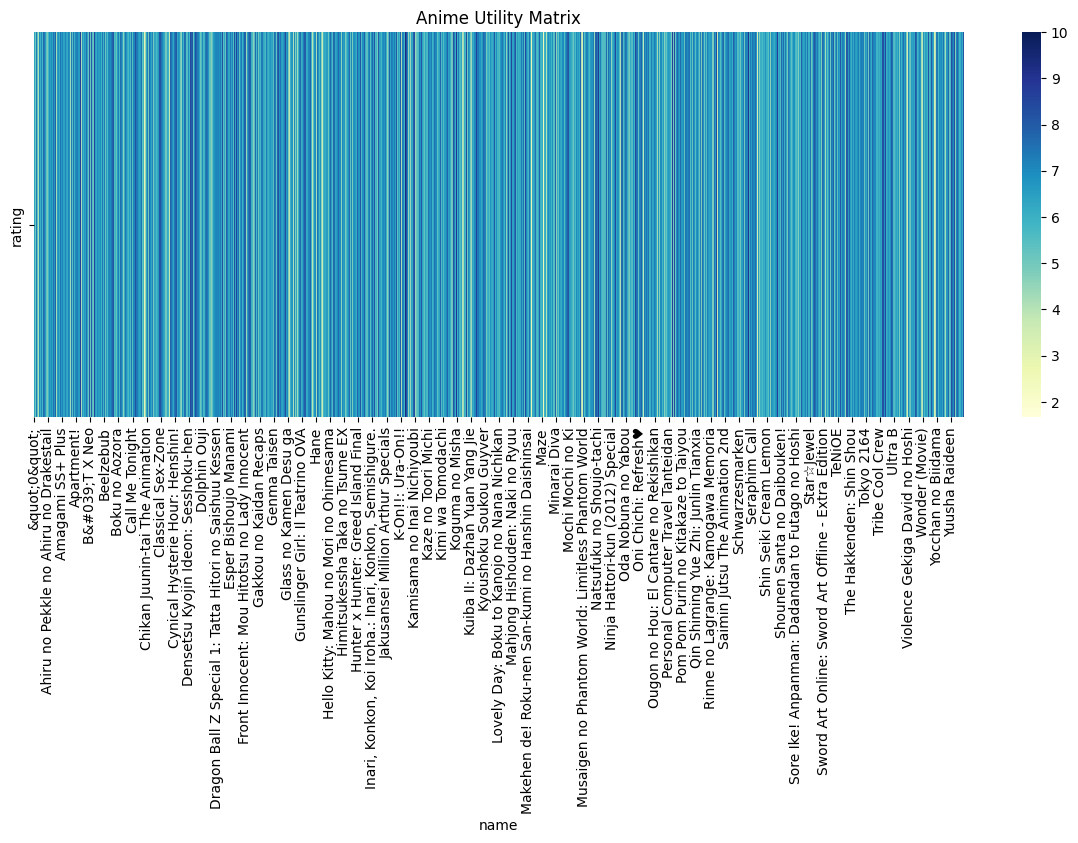

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming user_rating is your DataFrame
# Slice anime_id to include only the first 20 characters
anime_ratings['name'] = anime_ratings['name'].apply(lambda x: x[:20])

# Create a pivot table (utility matrix)
util_matrix = anime_data.pivot_table(columns='name', values='rating')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(15, 5))
# Select only the first 100 users for ease of computation and visualization
sns.heatmap(util_matrix.head(100), annot=False, ax=ax, cmap='YlGnBu')
ax.set_title('Anime Utility Matrix')
plt.show()


### With our utility matrix created, we now preprocess our data in preparation for similarity computation

In [ ]:
# Normalize each row (a given user's ratings) of the utility matrix
util_matrix_norm = util_matrix.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)
# Fill Nan values with 0's, transpose matrix, and drop users with no ratings
util_matrix_norm.fillna(0, inplace=True)
util_matrix_norm = util_matrix_norm.T
util_matrix_norm = util_matrix_norm.loc[:, (util_matrix_norm != 0).any(axis=0)]
# Save the utility matrix in scipy's sparse matrix format
util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

### Computing the similarity between users based on the ratings they have given various books

In [ ]:
# Compute the similarity matrix using the cosine similarity metric
user_similarity = cosine_similarity(util_matrix_sparse.T)
# Save the matrix as a dataframe to allow for easier indexing  
user_sim_df = pd.DataFrame(user_similarity,
                           index = util_matrix_norm.columns,
                           columns = util_matrix_norm.columns)

# Review a small portion of the constructed similarity matrix  
user_sim_df[:10]

,rating
rating,1.0


## Top N Recommender

Top-N Recommendations 

In order to produce a list of top-N recommendations for collaborative filtering, the following simple algorithm can be followed:

Select an initial reference user to generate recommendations for.
Extract all the similarity values between the reference user and each other user in the similarity matrix.
Sort the resulting similarity values in descending order, and select the  k most similar users based on these values.
For each selected user, collect their top-rated items.
Form a tally of which items are most popular across the  k similar users. Do this by counting how many times a top-rated item is common amongst the other users.
Sort the top-rated items according to the popularity tally. Return the top-N values as the result.

In [ ]:
def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular books in the item catalogue. 
    if user not in user_sim_df.columns:
        return user_rating.groupby('anime_id').mean().sort_values(by='rating',
                                        ascending=False).index[:N].to_list()

    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = [] # <-- List of highest rated items gathered from the k users  
    most_common_favorites = {} # <-- Dictionary of highest rated items in common for the k users

    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i]==max_score].index.tolist())

    # Loop over each user's favourite items and tally which ones are 
    # most popular overall.
    for item_collection in range(len(favorite_user_items)):
        for item in favorite_user_items[item_collection]:
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1
    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N = [x[0] for x in sorted_list]
    return top_N

In [ ]:
import operator

def collab_generate_top_N_recommendations(user, N=10, k=20):
    # Cold-start problem - no ratings given by the reference user. 
    # With no further user data, we solve this by simply recommending
    # the top-N most popular anime in the item catalogue. 
    if user not in user_sim_df.columns:
        return anime_data.set_index('anime_id').loc[
            user_rating.groupby('anime_id').mean().sort_values(by='rating', ascending=False).index[:N]
        ]['name'].tolist()

    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    favorite_user_items = []  # List of highest rated items gathered from the k users  
    most_common_favorites = {}  # Dictionary of highest rated items in common for the k users

    for i in sim_users:
        # Maximum rating given by the current user to an item 
        max_score = util_matrix_norm.loc[:, i].max()
        # Save the names of items maximally rated by the current user   
        favorite_user_items.append(util_matrix_norm[util_matrix_norm.loc[:, i] == max_score].index.tolist())

    # Loop over each user's favourite items and tally which ones are 
    # most popular overall.
    for item_collection in favorite_user_items:
        for item in item_collection:
            if item in most_common_favorites:
                most_common_favorites[item] += 1
            else:
                most_common_favorites[item] = 1

    # Sort the overall most popular items and return the top-N instances
    sorted_list = sorted(most_common_favorites.items(), key=operator.itemgetter(1), reverse=True)[:N]
    top_N_ids = [x[0] for x in sorted_list]

    # Get the names of the top-N anime
    top_N_names = anime_data.set_index('anime_id').loc[top_N_ids]['name'].tolist()
    return top_N_names


In [ ]:
# Our recommended list for user 3
collab_generate_top_N_recommendations(3)

['Choegang Top Plate',
 'STAR BEAT!: Hoshi no Kodou',
 'Konna Watashitachi ga Nariyuki de Heroine ni Natta Kekka www',
 'Yokohama Meibutsu: Otoko Katayama-gumi!',
 'Kirin Monoshiri Yakata',
 'McDull, the Alumni',
 'Mak Dau Xiang Dang Dang',
 'Dededen',
 'Mak Dau Goo Si',
 'Kero Kero Keroppi no Kero Kero House no Himitsu']

## Rating Prediction

In [ ]:
def collab_generate_rating_estimate(name, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user

    # Create a weighted sum for each of the k users who have rated the 
    # reference item (book).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, book_title]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list)
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[name])
    return predicted_rating

In [ ]:
def collab_generate_rating_estimate(name, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    # Store the corresponding user's similarity values 
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:k+1]
    rating_list = [] # <-- List of k user's ratings for the reference item
    weight_list = [] # <-- List of k user's similarities to the reference user

    # Create a weighted sum for each of the k users who have rated the 
    # reference item (book).
    for sim_idx, user_id in enumerate(sim_users):
        # User's rating of the item
        rating = util_matrix.loc[user_id, book_title]
        # User's similarity to the reference user 
        similarity = user_values[sim_idx]
        # Skip the user if they have not rated the item, or are too dissimilar to 
        # the reference user
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    try:
        # Return the weighted sum as the predicted rating for the reference item
        predicted_rating = sum(rating_list)/sum(weight_list)
    except ZeroDivisionError:
        # If no ratings for the reference item can be collected, return the average 
        # rating given by all users for the item.  
        predicted_rating = np.mean(util_matrix[name])
    return predicted_rating

# 5. Recommender Model Evaluation and Visualisation


### Evaluation of Model -Content Based Collaborator


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(predictions, true_ratings):
    """
    Calculate the Root Mean Squared Error (RMSE) between predicted and true ratings.
    
    Parameters:
    predictions (dict): A dictionary where keys are (user_id, anime_id) tuples and values are predicted ratings.
    true_ratings (dict): A dictionary where keys are (user_id, anime_id) tuples and values are true ratings.

    Returns:
    float: The RMSE value.
    """
    # Extract the predicted and true ratings
    pred_ratings = []
    true_ratings_list = []
    
    for (user_id, anime_id), pred_rating in predictions.items():
        if (user_id, anime_id) in true_ratings:
            true_ratings_list.append(true_ratings[(user_id, anime_id)])
            pred_ratings.append(pred_rating)
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(true_ratings_list, pred_ratings))
    return rmse

# Example usage
# Assume you have dictionaries for predictions and true ratings
predictions = {
    (1, 101): 4.5,
    (1, 102): 3.0,
    (2, 101): 5.0,
    # Add more predictions here
}

true_ratings = {
    (1, 101): 4.0,
    (1, 102): 3.5,
    (2, 101): 5.0,
    # Add more true ratings here
}

# Calculate RMSE
rmse = calculate_rmse(predictions, true_ratings)
print(f'RMSE: {rmse:.4f}')


RMSE: 0.4082


### Evaluate the Model Using RMSE: Collaborative Filtering System: User Rating Prediction


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Sample DataFrames (replace with your actual data)
user_sim_df = pd.DataFrame(
    np.random.rand(5, 5), 
    columns=[1, 2, 3, 4, 5],
    index=[1, 2, 3, 4, 5]
)

util_matrix = pd.DataFrame(
    np.random.rand(5, 5), 
    columns=[1, 2, 3, 4, 5],
    index=[18, 20, 22, 24, 45]
)

def collab_generate_rating_estimate(book_title, user, k=20, threshold=0.0):
    # Gather the k users which are most similar to the reference user 
    if user not in user_sim_df.columns:
        return np.nan  # Handle cases where user is not in the similarity DataFrame
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:k+1]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:, user].tolist()[1:k+1]
    rating_list = []
    weight_list = []

    for sim_idx, user_id in enumerate(sim_users):
        rating = util_matrix.loc[book_title, user_id] if book_title in util_matrix.index else np.nan
        similarity = user_values[sim_idx]
        if (np.isnan(rating)) or (similarity < threshold):
            continue
        rating_list.append(rating * similarity)
        weight_list.append(similarity)
    
    try:
        predicted_rating = sum(rating_list) / sum(weight_list)
    except ZeroDivisionError:
        predicted_rating = np.mean(util_matrix.loc[book_title]) if book_title in util_matrix.index else np.nan
    return predicted_rating

def evaluate_rmse(predictions, true_ratings):
    pred_ratings = []
    true_ratings_list = []

    for (user_id, anime_id), true_rating in true_ratings.items():
        predicted_rating = collab_generate_rating_estimate(anime_id, user_id)
        if not np.isnan(predicted_rating):
            pred_ratings.append(predicted_rating)
            true_ratings_list.append(true_rating)
    
    rmse = np.sqrt(mean_squared_error(true_ratings_list, pred_ratings)) if pred_ratings else np.nan
    return rmse

# Example true ratings
true_ratings = {
    (1, 18): 6,
    (1, 20): 6,
    (1, 22): 5,
    (1, 24): 1,
    (1, 45): 7
}

# Generate predictions dictionary
predictions = {
    (1, 18): collab_generate_rating_estimate(18, 1),
    (1, 20): collab_generate_rating_estimate(20, 1),
    (1, 22): collab_generate_rating_estimate(22, 1),
    (1, 24): collab_generate_rating_estimate(24, 1),
    (1, 45): collab_generate_rating_estimate(45, 1)
}

# Calculate RMSE
rmse = evaluate_rmse(predictions, true_ratings)
print(f'RMSE: {rmse:.4f}')


RMSE: 4.9346
